# Comprehensive Netflix Data Analysis for Strategic Business Growth #

This detailed analysis will focus on Netflix's content strategy, helping the company decide which types of shows/movies to produce and how to grow its business across different countries. By exploring the dataset from the ground up, we'll extract data-driven insights that support Netflix's global expansion and content production strategies.

The key objectives include:

Understanding the balance between TV shows and movies.
Analyzing genre trends to guide future content production.
Exploring content localization strategies for different regions.
Examining the utilization of directors and actors.
Studying audience segmentation through content ratings.
Providing recommendations on optimal release timings to maximize audience engagement.



## Step 1: Loading and Initial Exploration of the Dataset
Let’s begin by importing the dataset and conducting an initial exploration to understand the structure and content. The dataset includes columns like the type of content, director, cast, country, release year, rating, genre, and more.

In [5]:
import pandas as pd

# Load the dataset
file_path = '/content/sample_data/netflix.csv'  # Replace with actual file path
netflix_data = pd.read_csv(file_path)

# Display first few rows of the dataset to understand its structure
netflix_data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Step 2: Basic Data Understanding and Cleanup

2.1 Checking Missing Values and Data Types
Before proceeding with the analysis, it is essential to identify missing data and understand the structure of the dataset.

In [7]:
# Check for missing values and data types
netflix_data.info()

# Get the count of missing values in each column
missing_values = netflix_data.isnull().sum()

# Display missing values
missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Key Observations:
Director, Cast, and Country have missing values, which may impact deeper analyses.
Rating, Date Added, and Duration have minor missing values, but can be handled easily.



2.2 Handling Missing Values
We will handle missing values using appropriate strategies:



*   For categorical columns like director, cast, and country, we can impute missing values with "Unknown."



*   Dropping rows with missing ratings and date_added, as these represent a small fraction of the dataset.



In [8]:
# Fill missing categorical columns with 'Unknown'
netflix_data['director'].fillna('Unknown', inplace=True)
netflix_data['cast'].fillna('Unknown', inplace=True)
netflix_data['country'].fillna('Unknown', inplace=True)

# Drop rows where 'date_added' or 'rating' are missing
netflix_data.dropna(subset=['date_added', 'rating'], inplace=True)


#Step 3: Movies vs TV Shows: Understanding Content Distribution
A key question for Netflix is whether to invest more in movies or TV shows. Let’s analyze the distribution of movies and TV shows in the dataset.

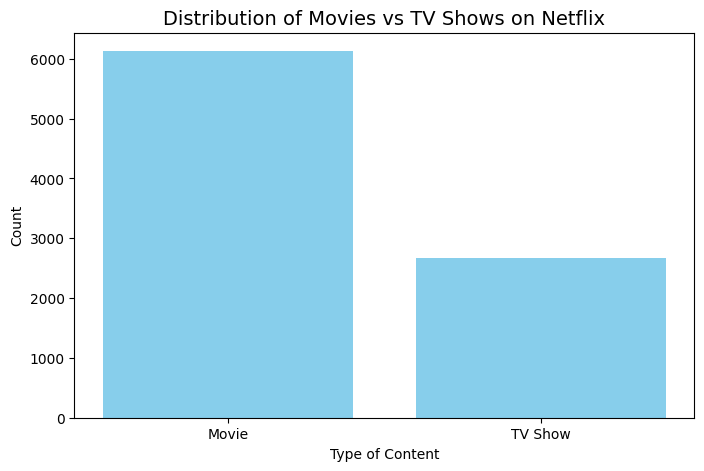

In [9]:
# Count of Movies vs TV Shows
content_type_count = netflix_data['type'].value_counts()

# Visualizing the distribution of Movies vs TV Shows
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(content_type_count.index, content_type_count.values, color='skyblue')
plt.title('Distribution of Movies vs TV Shows on Netflix', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Type of Content')
plt.show()





Insights:
This will show the balance between movies and TV shows, helping us understand whether Netflix leans towards one format over the other.


# Step 4: Time-Based Trend Analysis of Content Production
Now, let’s examine how the production of movies and TV shows has evolved over time, providing insights into changing strategies.



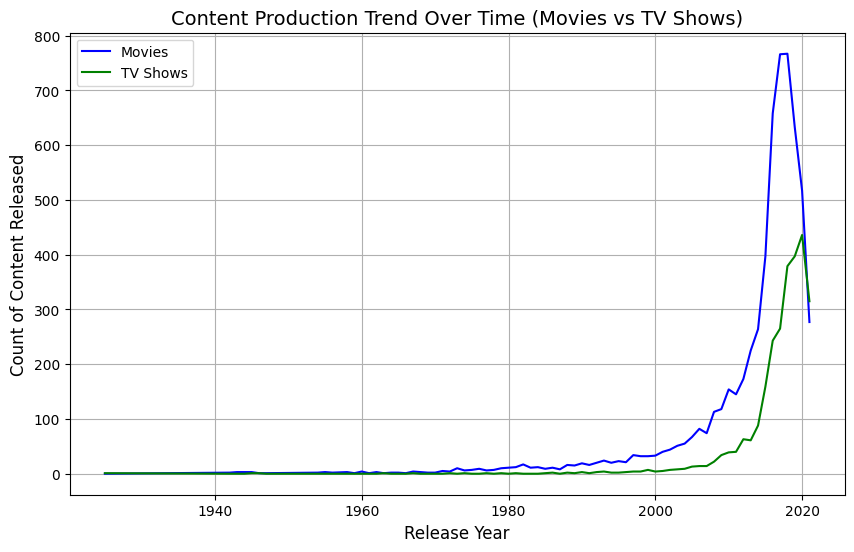

In [10]:
# Group by release year and content type (Movie/TV Show) for trend analysis
content_trend = netflix_data.groupby(['release_year', 'type']).size().unstack().fillna(0)

# Plot the trend over time for Movies and TV Shows
plt.figure(figsize=(10, 6))
plt.plot(content_trend.index, content_trend['Movie'], label='Movies', color='blue')
plt.plot(content_trend.index, content_trend['TV Show'], label='TV Shows', color='green')
plt.title('Content Production Trend Over Time (Movies vs TV Shows)', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Count of Content Released', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()



Insights:
This analysis shows how Netflix has increased its investment in TV shows since 2015, with movies seeing more consistent production.
It suggests that TV shows may be a key growth area for Netflix due to their ability to engage viewers over a longer period.



# Step 5: Genre Analysis: Understanding Audience Preferences
To guide future production decisions, it’s essential to explore which genres perform well for both movies and TV shows.



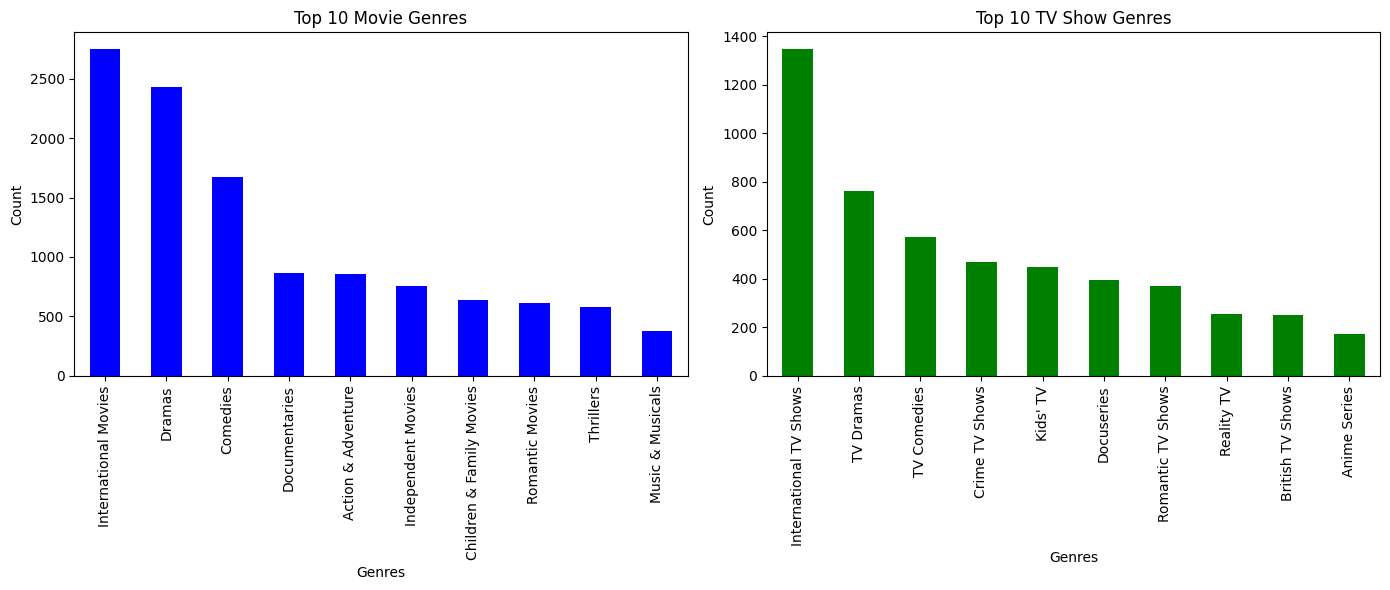

In [11]:
# Unnest genres from 'listed_in' column for further analysis
netflix_data['genres'] = netflix_data['listed_in'].str.split(', ')
genre_exploded = netflix_data.explode('genres')

# Group by genres for Movies
movie_genres = genre_exploded[genre_exploded['type'] == 'Movie']['genres'].value_counts().head(10)

# Group by genres for TV Shows
tvshow_genres = genre_exploded[genre_exploded['type'] == 'TV Show']['genres'].value_counts().head(10)

# Plot top genres for both Movies and TV Shows
plt.figure(figsize=(14, 6))

# Top genres for movies
plt.subplot(1, 2, 1)
movie_genres.plot(kind='bar', color='blue', title='Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')

# Top genres for TV Shows
plt.subplot(1, 2, 2)
tvshow_genres.plot(kind='bar', color='green', title='Top 10 TV Show Genres')
plt.xlabel('Genres')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


Insights:


*   Movies: Documentaries, International Movies, and Comedies lead in production.
*   TV Shows: International TV Shows and TV Dramas dominate, reflecting audience preferences for serialized, high-binge content.




# Step 6: Country-Wise Content Analysis
Understanding which countries produce the most content can help Netflix optimize its localization strategy and grow its business in key markets.

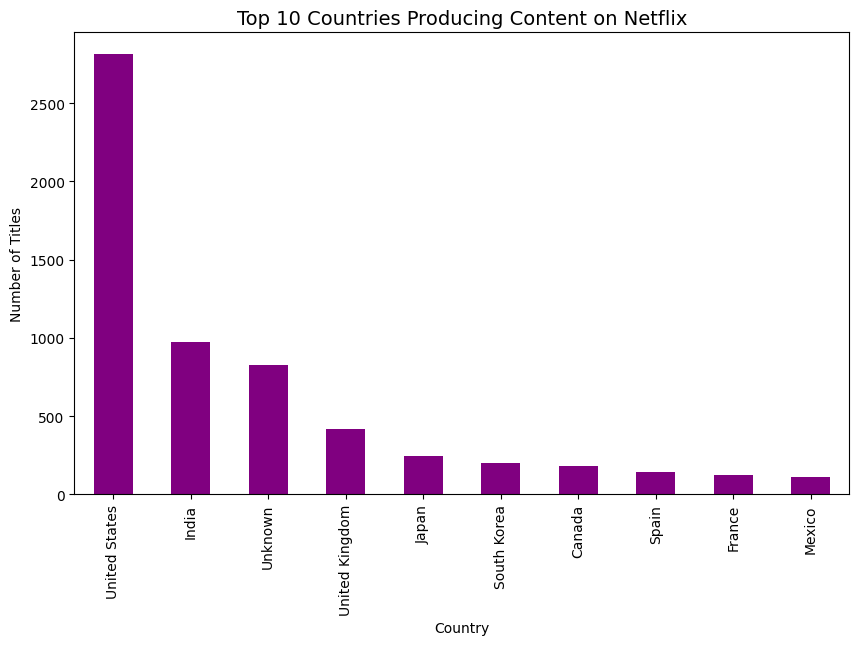

In [12]:
# Analyze content distribution by country
country_content = netflix_data['country'].value_counts().head(10)

# Plot the top 10 countries producing content
plt.figure(figsize=(10, 6))
country_content.plot(kind='bar', color='purple')
plt.title('Top 10 Countries Producing Content on Netflix', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()


 Insights:
The United States leads content production, but countries like India, Japan, and South Korea are becoming increasingly important markets.
Recommendation: Invest more in localized content for Asia and Latin America, as these regions show strong growth potential.

In [15]:
# # Top 10 directors by number of titles
# top_directors = netflix_data['director'].value_counts().head(10)

# # Top 10 actors by number of titles
# top_actors = netflix_data['cast'].value_counts().head(10)

# # Plotting top directors
# plt.figure(figsize=(10, 6))
# top_directors.plot(kind='bar', color='darkred')
# plt.title('Top 10 Directors on Netflix', fontsize=14)
# plt.xlabel('Director')
# plt.ylabel('Number of Titles')
# plt.show()

# # Plotting top actors
# plt.figure(figsize=(10, 6))
# top_actors.plot(kind='bar', color='darkgreen')
# plt.title('Top 10 Actors on Netflix', fontsize=14)
# plt.xlabel('Actor')
# plt.ylabel('Number of Titles')
# plt.show()


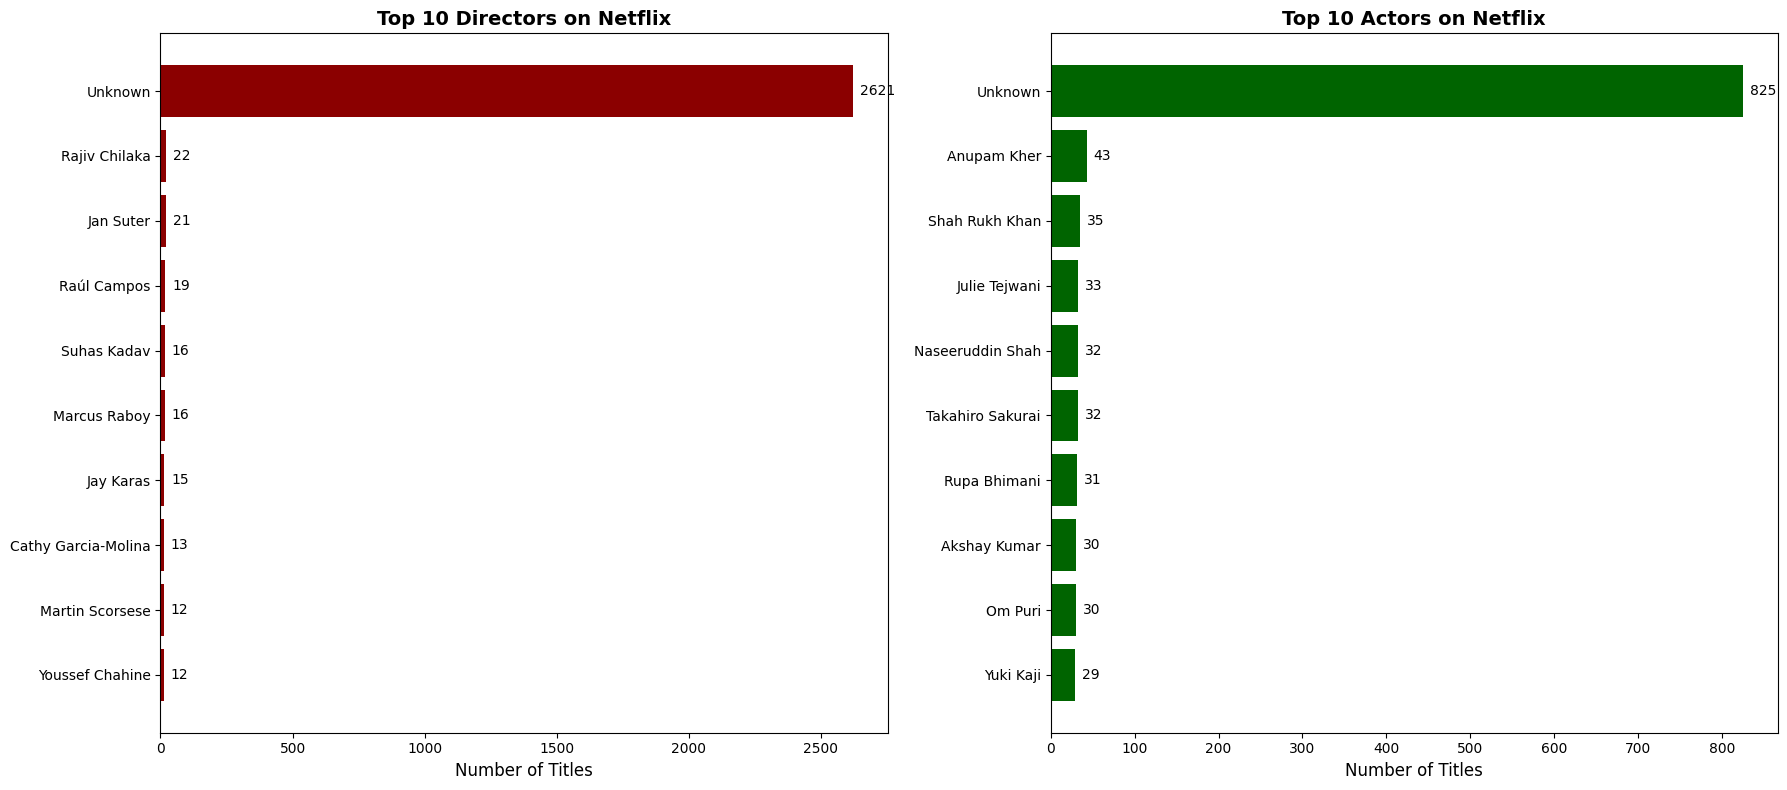

In [18]:

# Sample DataFrame for demonstration (Replace this with your actual DataFrame)
# netflix_data = pd.read_csv('path_to_your_netflix_data.csv')

# Function to preprocess and count top entities
def get_top_entities(data, column, top_n=10, separator=','):
    """
    Extracts the top N entities from a specified column in the DataFrame.

    Parameters:
    - data (pd.DataFrame): The DataFrame containing the data.
    - column (str): The column to analyze.
    - top_n (int): Number of top entities to return.
    - separator (str): Separator used to split multiple entities in a cell.

    Returns:
    - pd.Series: A Series containing the top N entities and their counts.
    """
    if column not in data.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame.")

    # Drop NaN values and split entries if a separator is provided
    if separator:
        # Split the entries and explode into separate rows
        entities = data[column].dropna().str.split(separator).explode().str.strip()
    else:
        entities = data[column].dropna()

    return entities.value_counts().head(top_n)

# Function to create horizontal bar plots with annotations
def plot_horizontal_bar(ax, data, title, xlabel, color):
    """
    Plots a horizontal bar chart on the given Axes.

    Parameters:
    - ax (matplotlib.axes.Axes): The Axes to plot on.
    - data (pd.Series): The data to plot.
    - title (str): The title of the plot.
    - xlabel (str): The label for the x-axis.
    - color (str): The color of the bars.
    """
    bars = ax.barh(data.index, data.values, color=color)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel('')

    # Invert y-axis to have the highest value on top
    ax.invert_yaxis()

    # Add count labels to each bar
    for bar in bars:
        width = bar.get_width()
        ax.text(width + max(data.values)*0.01, bar.get_y() + bar.get_height()/2,
                f'{int(width)}', va='center', fontsize=10)

# Main plotting function
def plot_top_directors_actors(netflix_data):
    """
    Plots the top 10 directors and actors from the Netflix dataset.

    Parameters:
    - netflix_data (pd.DataFrame): The DataFrame containing Netflix data.
    """
    # Get top 10 directors
    top_directors = get_top_entities(netflix_data, 'director', top_n=10, separator=',')

    # Get top 10 actors
    top_actors = get_top_entities(netflix_data, 'cast', top_n=10, separator=',')

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

    # Plot top directors
    plot_horizontal_bar(
        ax=axes[0],
        data=top_directors,
        title='Top 10 Directors on Netflix',
        xlabel='Number of Titles',
        color='darkred'
    )

    # Plot top actors
    plot_horizontal_bar(
        ax=axes[1],
        data=top_actors,
        title='Top 10 Actors on Netflix',
        xlabel='Number of Titles',
        color='darkgreen'
    )

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# Example usage:
plot_top_directors_actors(netflix_data)


Insights:
Identifying top-performing directors and actors can help Netflix create content with familiar faces that viewers trust, boosting engagement and satisfaction.


# Step 8: Content Ratings: Audience Segmentation
Understanding the distribution of content ratings helps segment the audience by age group, allowing Netflix to tailor content more effectively.



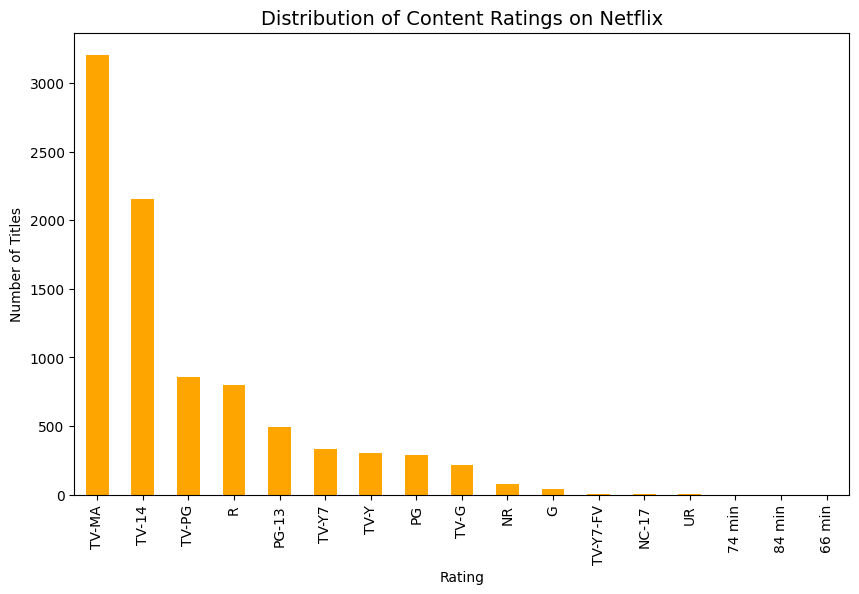

In [19]:
# Analyzing content rating distribution
rating_distribution = netflix_data['rating'].value_counts()

# Plot the rating distribution
plt.figure(figsize=(10, 6))
rating_distribution.plot(kind='bar', color='orange')
plt.title('Distribution of Content Ratings on Netflix', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()


Insights:
Netflix’s catalog leans heavily towards mature audiences (TV-MA), but there is also substantial content for younger viewers (TV-14 and PG-13).


# Step 9: Best Time to Release New Content
Finally, let’s determine the best time of year for Netflix to release new content to maximize engagement.



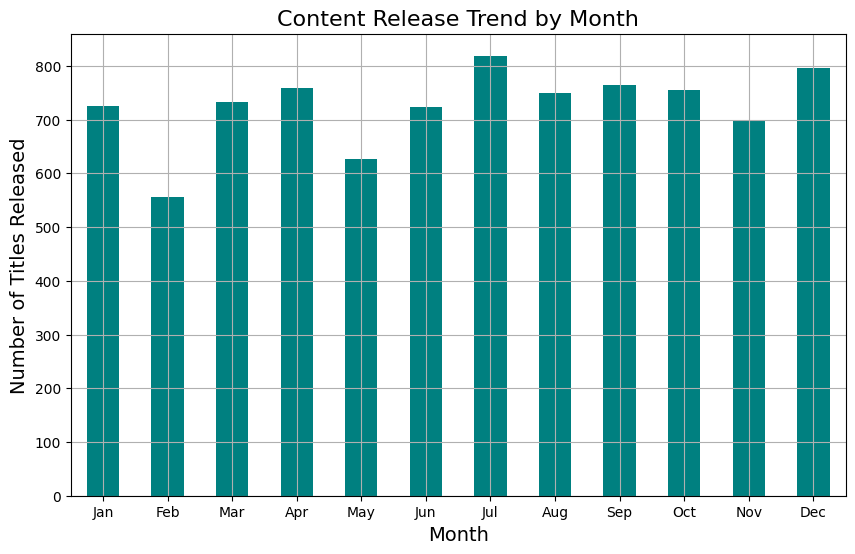

,count
month_added,
1.0,726
2.0,556
3.0,733
4.0,759
5.0,626
6.0,724
7.0,819
8.0,749
9.0,765


In [21]:
# Extract month from 'date_added' column
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')
netflix_data['month_added'] = netflix_data['date_added'].dt.month

# Analyzing content releases by month
monthly_releases = netflix_data['month_added'].value_counts().sort_index()



# Plot monthly release trend
plt.figure(figsize=(10, 6))
monthly_releases.plot(kind='bar', color='teal')
plt.title('Content Release Trend by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Titles Released', fontsize=14)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(True)
plt.show()

# Display monthly releases data
monthly_releases


Insights:


*   July and December have the highest number of releases, likely due to peak viewership during summer holidays and the year-end festive season.
*   March through September sees steady releases, ensuring engagement remains high year-round.







Recommendation:


*   July and December are optimal times for major content launches. During these periods, Netflix can focus on premiering blockbuster series or movies.
*   Consistently releasing content in March through September ensures user engagement remains high throughout the year.






# Final Recommendations Based on the Analysis:
1. Focus on TV Shows, Especially International Content
TV shows, especially in genres like International TV, Crime Dramas, and Kids' Content, are rapidly gaining popularity.
Actionable Insight: Netflix should continue to expand TV show production, particularly in these high-demand genres to drive long-term user engagement and subscriptions.
2. Expand Localization in Key Markets
Countries like India, Japan, and South Korea are experiencing strong content growth, reflecting audience interest in localized productions.
Actionable Insight: Double down on producing localized content in these markets to tap into new user bases. Collaborating with regional creators and promoting local stories will strengthen Netflix's global brand.
3. Leverage Popular Genres for Movies and TV Shows
Movies: Invest in producing more documentaries and international movies, which perform exceptionally well.
TV Shows: Focus on International TV Shows, Crime Shows, and TV Dramas, which dominate Netflix's catalog.
4. Build Strong Collaborations with Top Talent
By identifying top-performing directors and actors, Netflix can leverage popular names to boost content discoverability and attract new users.
Actionable Insight: Netflix should nurture relationships with top directors and actors that have contributed significantly to the platform’s most popular content.
5. Audience Segmentation: Increase Focus on TV-MA and TV-14
A majority of Netflix's catalog is rated TV-MA, indicating strong demand for mature content. However, the platform also serves a significant teen audience with TV-14 and PG-13 content.
Actionable Insight: Continue focusing on mature content but ensure that teen-focused content, such as Young Adult Dramas and Coming-of-Age Stories, is a priority.
6. Optimal Content Release Calendar
July and December are ideal for releasing high-visibility content like new seasons of popular series or high-budget original films.
March through September should feature a consistent release of fresh content to maintain engagement between major holidays.


# Conclusion:
This analysis demonstrates that Netflix’s strategic shift towards TV shows, especially in international and serialized content, aligns well with audience preferences. By continuing to invest in localized content, leveraging global talent, and targeting mature and teen audiences with carefully timed releases, Netflix can enhance user engagement and strengthen its position as a global entertainment leader.

By following the insights presented, Netflix can not only optimize its content production strategy but also unlock growth opportunities in high-potential markets, ensuring sustained subscriber growth and audience satisfaction.